In [26]:
# Import usefull python modules(pandas, numpy, pyplot)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import datasets, neighbors, metrics from sklearn

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# import ListedColormap from matplotlib, import warnings

from matplotlib.colors import ListedColormap
import warnings



warnings.filterwarnings("ignore")


In [27]:
data= load_iris()

In [28]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [29]:
def knn_comparison(data, n_neighbors = 15):


#     define X and y where X having first 2 columns and y has last or 3rd column. Hint: Use slicing
    X = data[:, :2]
    y = data[:, 2]



    h = .02  # step size in the mesh (grid cell size)
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF']) #having light colors
    cmap_bold = ListedColormap(['#FF0000', '#0000FF']) # having above matching shades of dark colors


    '''the core classifier: k-NN'''

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)                       #initialise KNN classifier with n_neighbors as its parameters
    clf.fit(X, y)

#   Get  minimum value-1 and maximum value+1 from X's 0th column
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    # Get  minimum value-1 and maximum value+1 from X's 1th column
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    '''

    we create a mesh grid (x_min,x_max) and (y_min y_max) with 0.02 grid spaces.
    which you defined already in h variable.

    Hint: Use numpy meshgrid function : https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

    '''
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))



    ''' we predict the value (either 0 or 1) of each element in the grid
        Hint: Use numpy c_ function to read xx and yy with ravel function on it.
        Reference: https://numpy.org/doc/stable/reference/generated/numpy.c_.html
    '''

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


    # convert the output back to the xx shape as we need it to plot the decision boundry)
    Z = Z.reshape(xx.shape)


    '''Now lets plot our descision boudries using pcolormesh function
        Hint : use xx, yy, Z and cmap as cmap_light
    '''
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)



    # scatter plot of with given points i.e having 1st and 2nd columns of X, c as y and cmap as cmap_bold
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)


    #defining scale on both axises with x limited to xx's min and max values and y limited to yy'ss min and max values
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())




    # set the title as K values = n_neighbors
    plt.title("K values = {}".format(n_neighbors))
    plt.show()

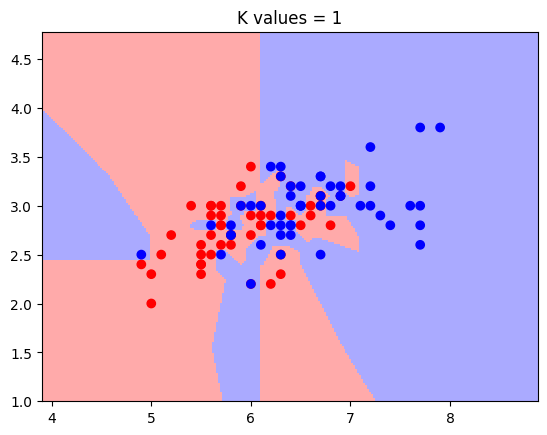

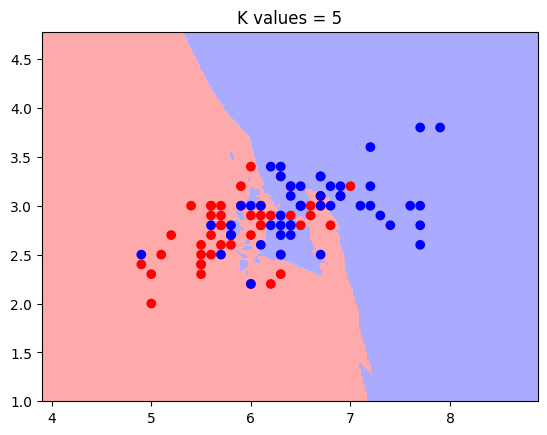

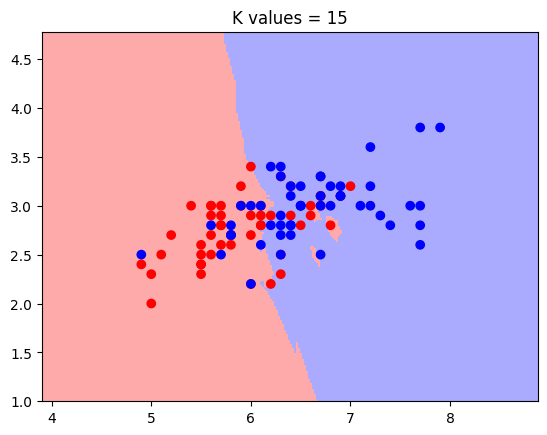

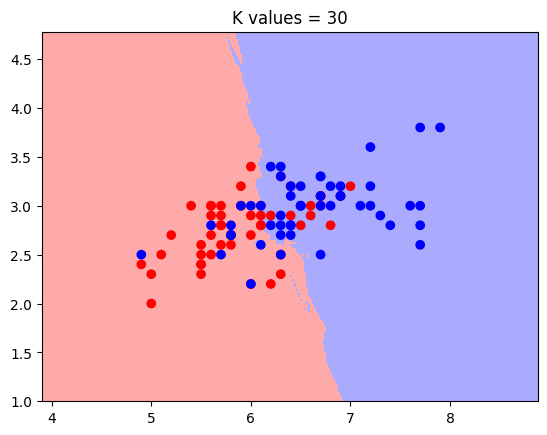

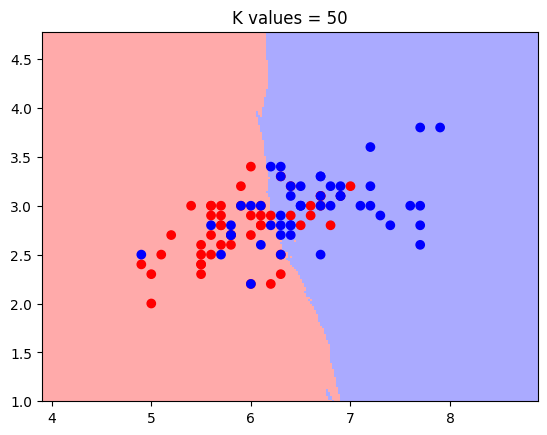

In [30]:
# use genfromtext to load 6.overlap.csv file using delimiter = ','
data = np.genfromtxt('6.overlap.csv', delimiter=',')


# Now lets use knn_comparison function on above loaded data with n values as 1,5,15, 30 and 50
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)
knn_comparison(data, 30)
knn_comparison(data, 50)

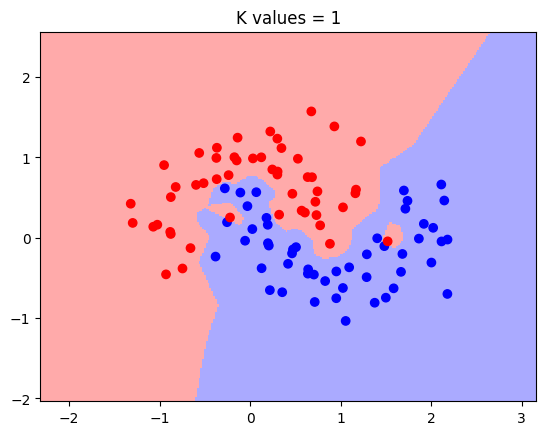

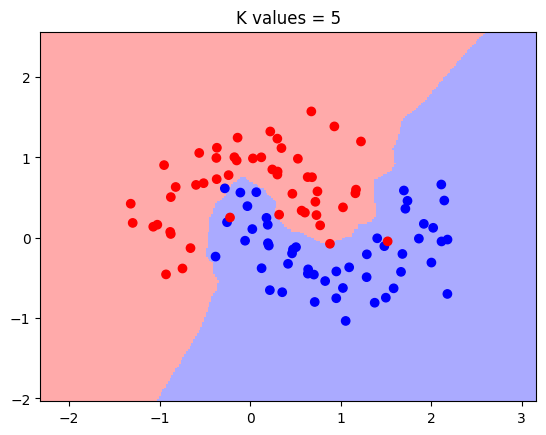

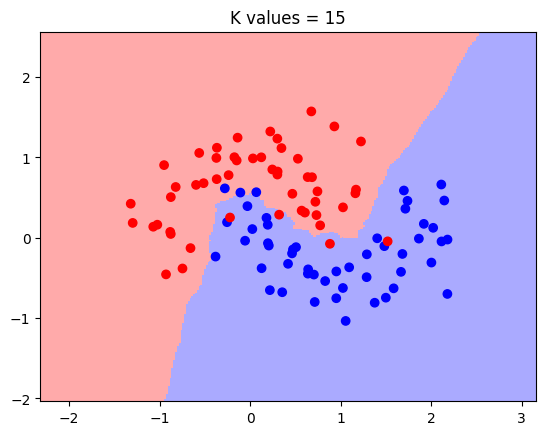

In [32]:
# load 1.ushape.csv data
data = np.genfromtxt('1.ushape.csv', delimiter=',')


# Now lets use knn_comparison function on above loaded data with n values as 1,5,15 and 30
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)


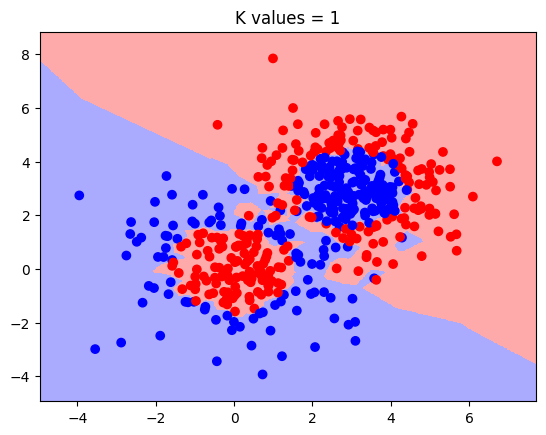

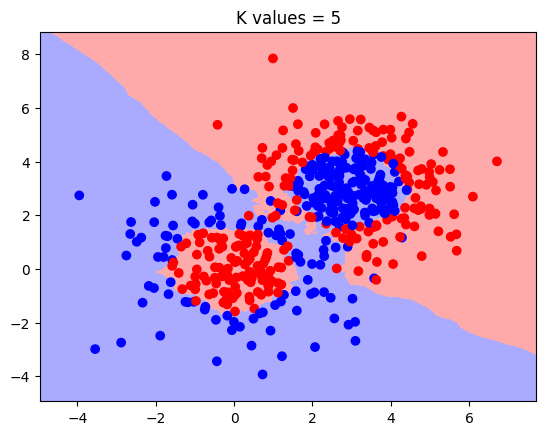

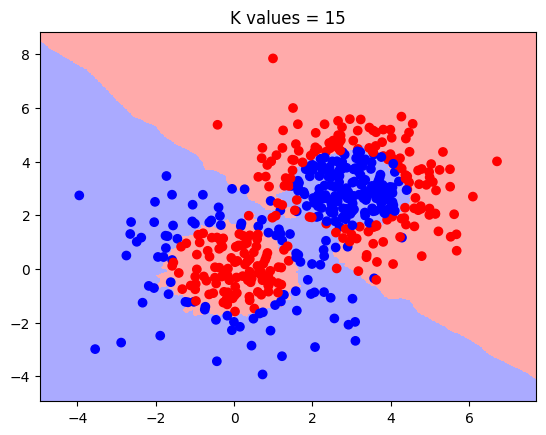

In [33]:
# load 3.concertriccir2.csv data.
data =  np.genfromtxt('3.concertriccir2.csv', delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,and 15
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)




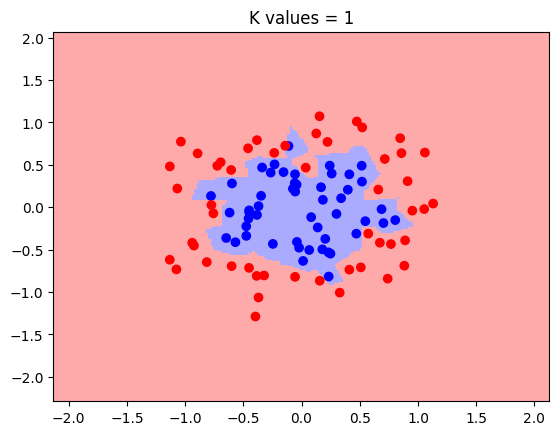

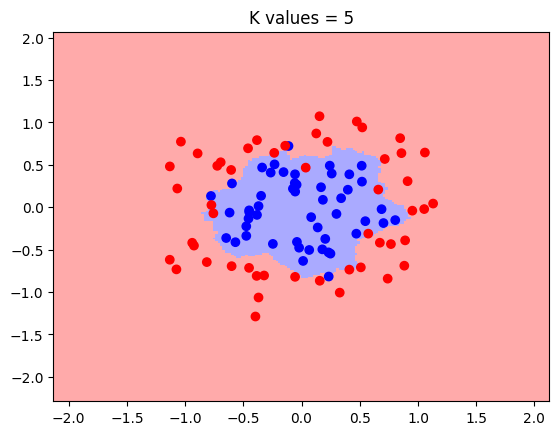

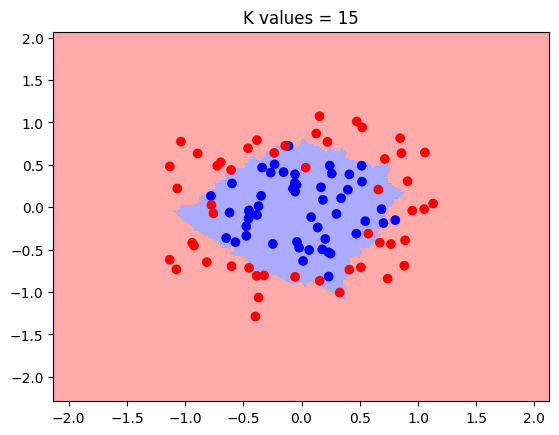

In [35]:
# load 2.concerticcir1.csv data
data = np.genfromtxt('2.concerticcir1.csv', delimiter=',')


# Now lets use knn_comparison function on above loaded data with n values as 1,5,15,and 30
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)


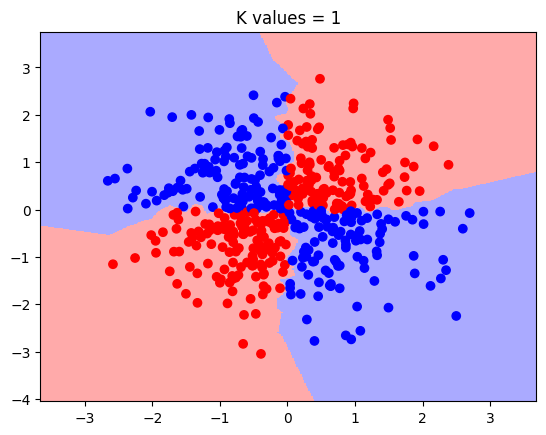

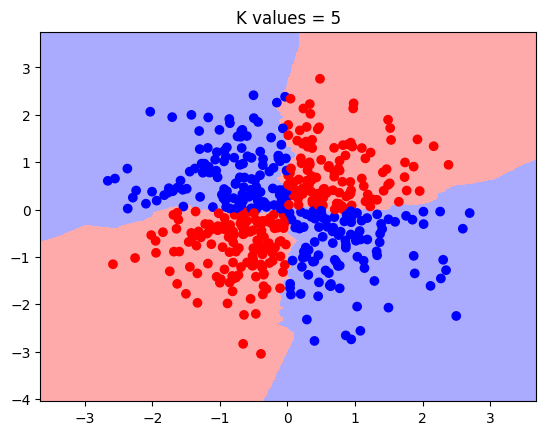

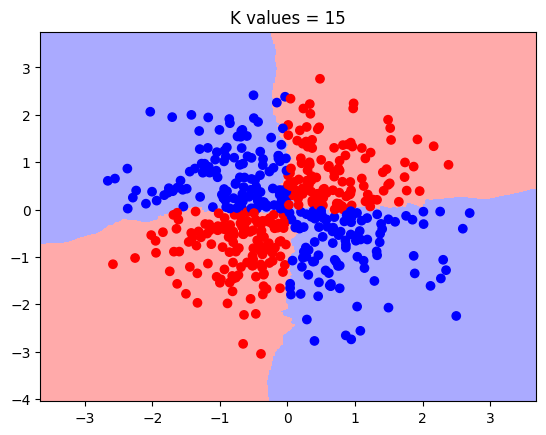

In [37]:
# load demo_data/7.xor.csv
data = np.genfromtxt('7.xor.csv', delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,and 15
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)




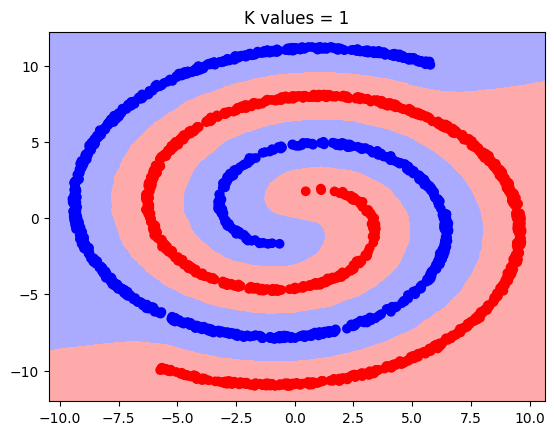

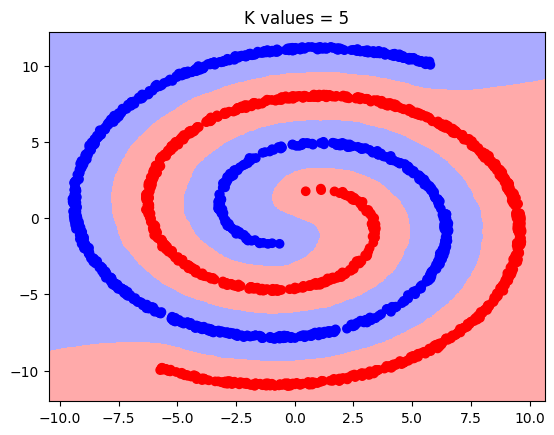

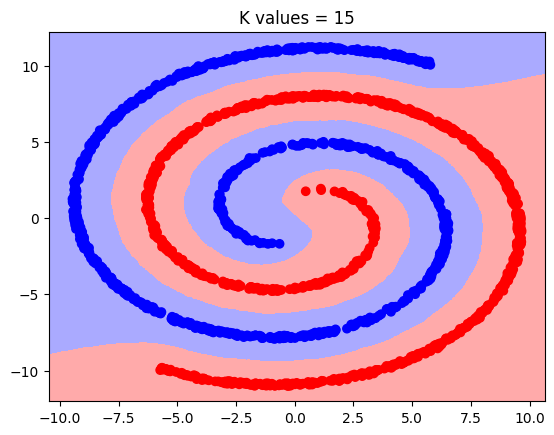

In [38]:
# Load 8.twospirals.csv data
data = np.genfromtxt('8.twospirals.csv', delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,and 15
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)


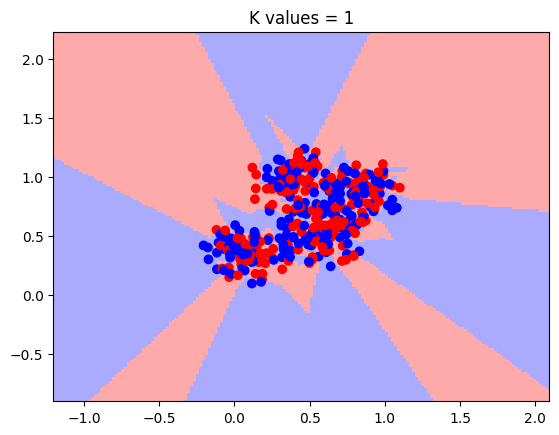

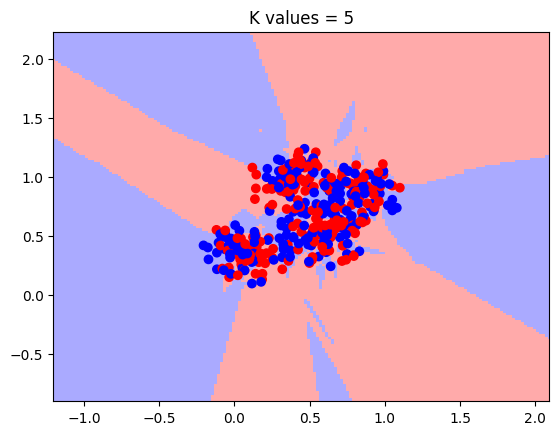

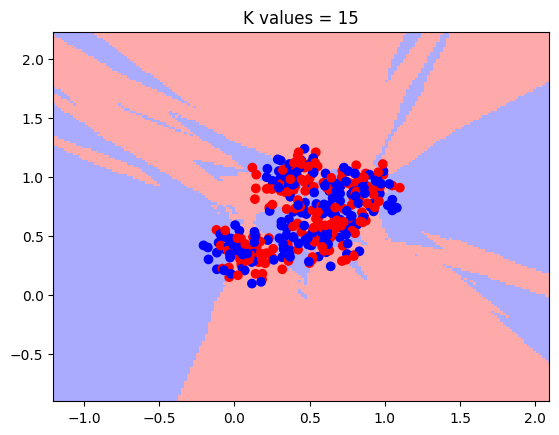

In [39]:
# Load 9.random.csv data
data =  np.genfromtxt('9.random.csv', delimiter=',')

# Now lets use knn_comparison function on above loaded data with n values as 1,5,and 15
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)





In [42]:
#Importing of the dataset

dataset = pd.read_csv('/content/Social_Network_Ads.csv')


#Print variable information on  dataset
dataset




,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [59]:
# slicing it into independent and dependent variables
X = dataset.drop('Purchased', axis = 1)

y = dataset['Purchased']


In [60]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder



#Instantiate LabelEncoder function
le = LabelEncoder()


#fit and encode the feature which is of object type
X['Gender'] = le.fit_transform(X['Gender'])






In [61]:
# importing train_test_split
from sklearn.model_selection import train_test_split


#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)




In [62]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler


#Instantiate StandardScaler
sc = StandardScaler()
#fit transform sc on X_train
X_train = sc.fit_transform(X_train)
#Transform scaling on X_test
X_test = sc.transform(X_test)


In [63]:
#Instantiate KNeighborsClassifier with n_neighbors as 5,  metric as 'minkowski' and p as 2
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)


#fitting classifier on training data
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [64]:
#prediction on X_test
y_pred =  classifier.predict(X_test)


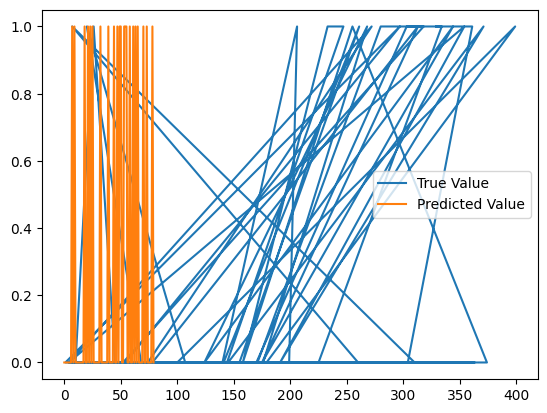

In [65]:
# Comparing true and predicted value using plot
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.legend()



In [66]:
# import confusion_matrix and accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score


#confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#accuracy_score
ac = accuracy_score(y_test, y_pred)

# print accuracy_score and confusion_matrix
print('Accuracy Score: ', ac)
print('Confusion Matrix: \n', cm)





Accuracy Score:  0.95
Confusion Matrix: 
 [[56  2]
 [ 2 20]]


In [67]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# empty list to append scores
scores = []

# loop through k_range
for k in k_range:



    #Initiate KNN with n_neighbors as k
    knn = KNeighborsClassifier(n_neighbors = k)

    #Fitting model on training data
    knn.fit(X_train, y_train)

    #Predict on X_test
    y_pred = knn.predict(X_test)



    # We append the scores in the dictionary in list
    scores.append(accuracy_score(y_test, y_pred))

    print(scores)



[0.9]
[0.9, 0.9125]
[0.9, 0.9125, 0.95]
[0.9, 0.9125, 0.95, 0.9125]
[0.9, 0.9125, 0.95, 0.9125, 0.95]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375, 0.925]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375, 0.925, 0.9125]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375, 0.925, 0.9125, 0.925]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375, 0.925, 0.9125, 0.925, 0.9]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375, 0.925, 0.9125, 0.925, 0.9, 0.925]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375, 0.925, 0.9125, 0.925, 0.9, 0.925, 0.9375]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375, 0.925, 0.9125, 0.925, 0.9, 0.925, 0.9375, 0.95]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375, 0.925, 0.9125, 0.925, 0.9, 0.925, 0.9375, 0.95, 0.925]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375, 0.925, 0.9125, 0.925, 0.9, 0.925, 0.9375, 0.95, 0.925, 0.9375]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375, 0.925, 0.9125, 0.925, 0.9, 0.925, 0.9375, 0.95, 0.925, 0.9375, 0.925]
[0.9, 0.9125, 0.95, 0.9125, 0.95, 0.9375, 0.925, 0.91

Text(0, 0.5, 'Testing Accuracy')

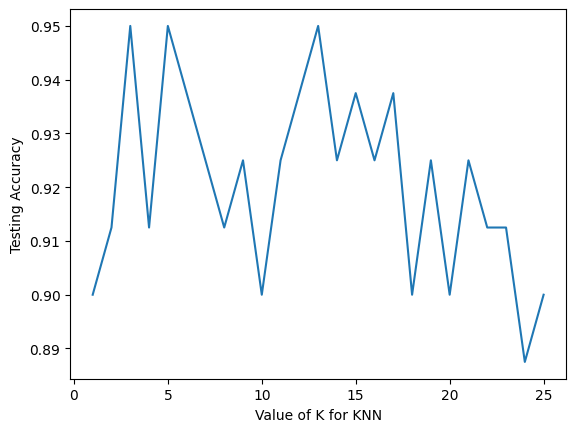

In [68]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
